In [ ]:
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
import textblob
from textblob import TextBlob
import re
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
xb = gc.open_by_key("1l-HCjv_9eVShQ8P1-E041YrO_gOZ5AC2j5v0Gqirq-4")
ps = gc.open_by_key("1_LegzG-GlUsEs28UBojXuA7xGg8eDGdRF9K_iFyj2_Y")
xb = xb.worksheet('Stream')
ps = ps.worksheet('Stream')
xb = xb.get_all_values()
ps = ps.get_all_values()
xb = pd.DataFrame(xb)
ps = pd.DataFrame(ps)
xb.columns = xb.iloc[0]
xb = xb.iloc[1:]
ps.columns = ps.iloc[0]
ps = ps.iloc[1:]
xb = xb[['Post ID', 'Sound Bite Text', 'Published Date (GMT+02:00) Windhoek']]
ps = ps[['Post ID', 'Sound Bite Text', 'Published Date (GMT+02:00) Windhoek']]
xb['Published Date (GMT+02:00) Windhoek'] = pd.to_datetime(xb['Published Date (GMT+02:00) Windhoek'])
ps['Published Date (GMT+02:00) Windhoek'] = pd.to_datetime(ps['Published Date (GMT+02:00) Windhoek'])

In [ ]:
for i in range(1,len(xb['Sound Bite Text'])):
  xb['Sound Bite Text'][i] = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", xb['Sound Bite Text'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
xb['sent'] = xb['Sound Bite Text'].apply(lambda x:TextBlob(x.strip()).sentiment)
ps['sent'] = ps['Sound Bite Text'].apply(lambda x:TextBlob(x.strip()).sentiment)
xb = pd.concat([xb,pd.DataFrame(xb['sent'].tolist(), index=xb.index)], axis = 1)
ps = pd.concat([ps,pd.DataFrame(xb['sent'].tolist(), index=xb.index)], axis = 1)
xb = xb.drop(columns='sent')
ps = ps.drop(columns='sent')

In [ ]:
fechas = []
for x in xb['Published Date (GMT+02:00) Windhoek']:
   fechas.append(x.floor("D"))
xb['Date'] = fechas
fechas = []
for x in ps['Published Date (GMT+02:00) Windhoek']:
   fechas.append(x.floor("D"))
ps['Date'] = fechas

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


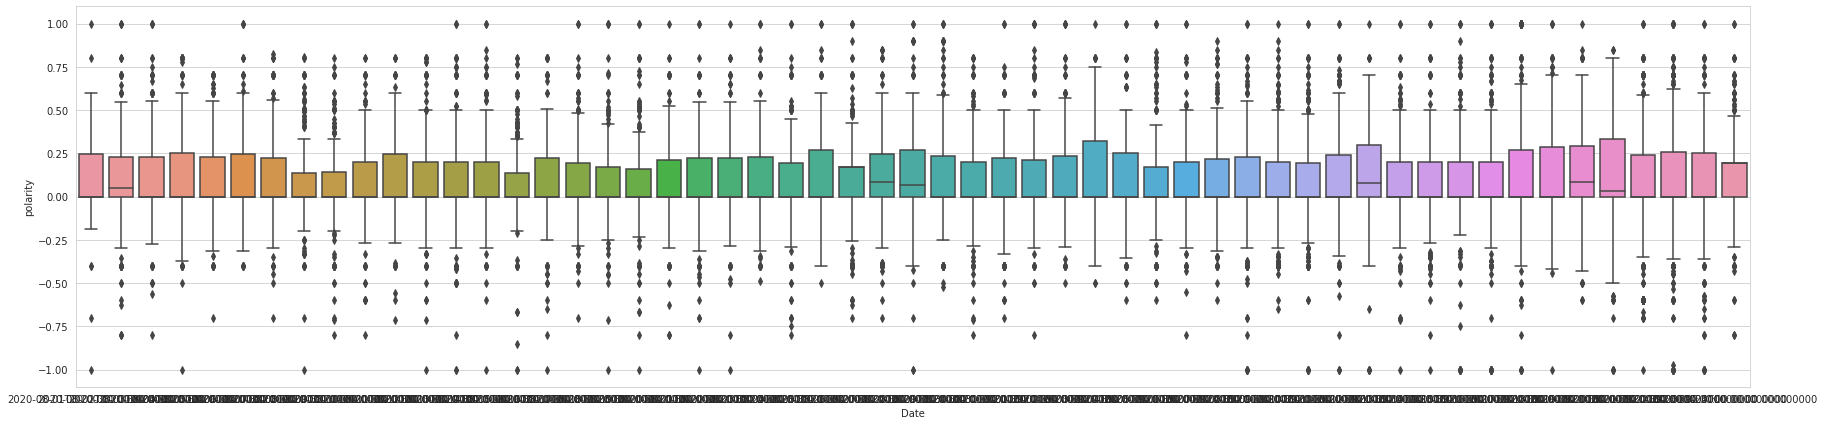

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
sns.set_style("whitegrid")
pos = xb[xb['polarity']>0]
neg = xb[xb['polarity']<0]
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.boxplot(x = 'Date', y = 'polarity', data = xb, ax = ax)
#sns.boxplot(x = 'fecha', y = 'polarity', data = neg, ax = ax)

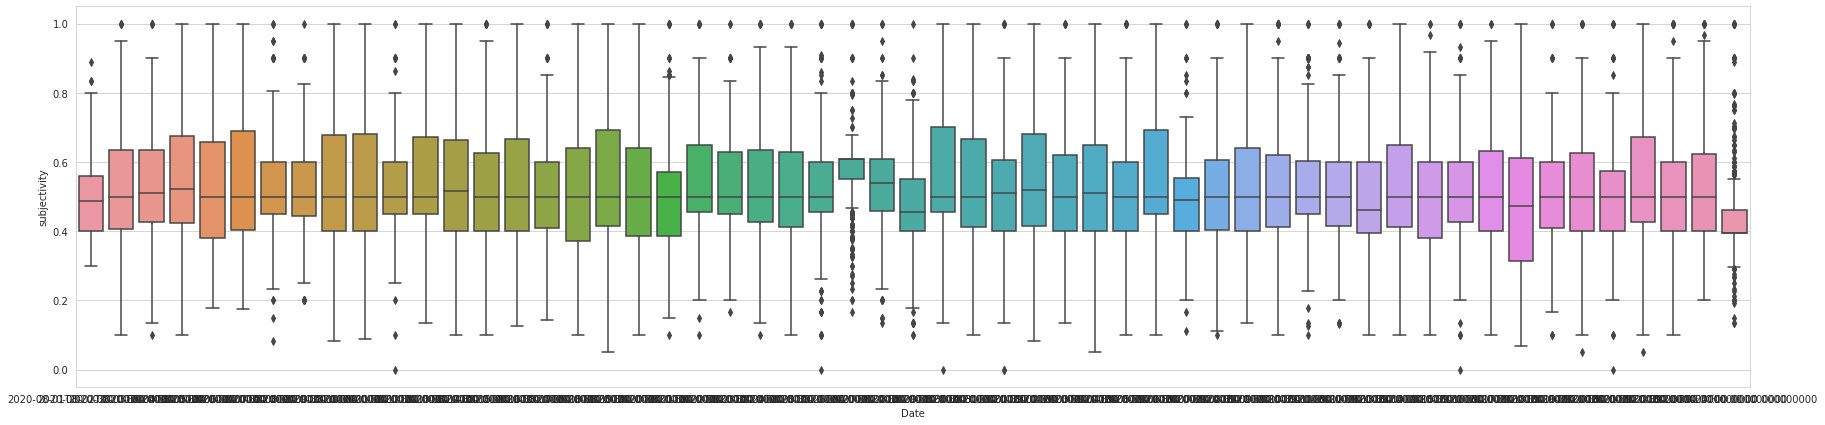

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.boxplot(x = 'Date', y = 'subjectivity', data = pos, ax = ax)

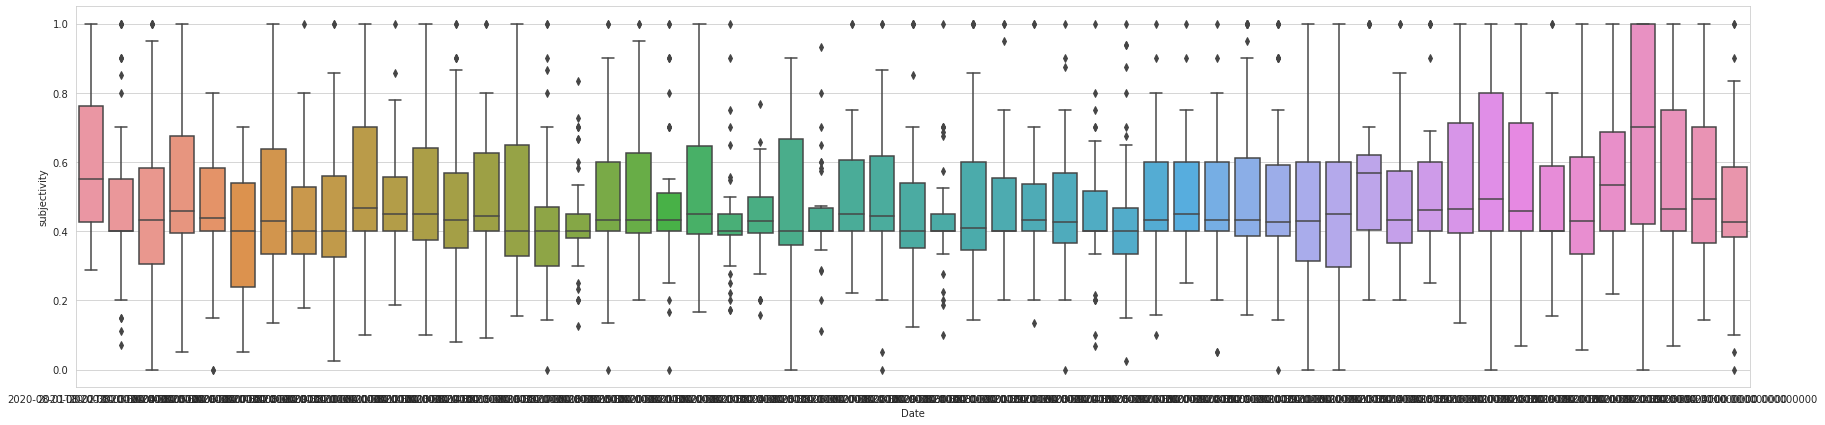

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.boxplot(x = 'Date', y = 'subjectivity', data = neg, ax = ax)

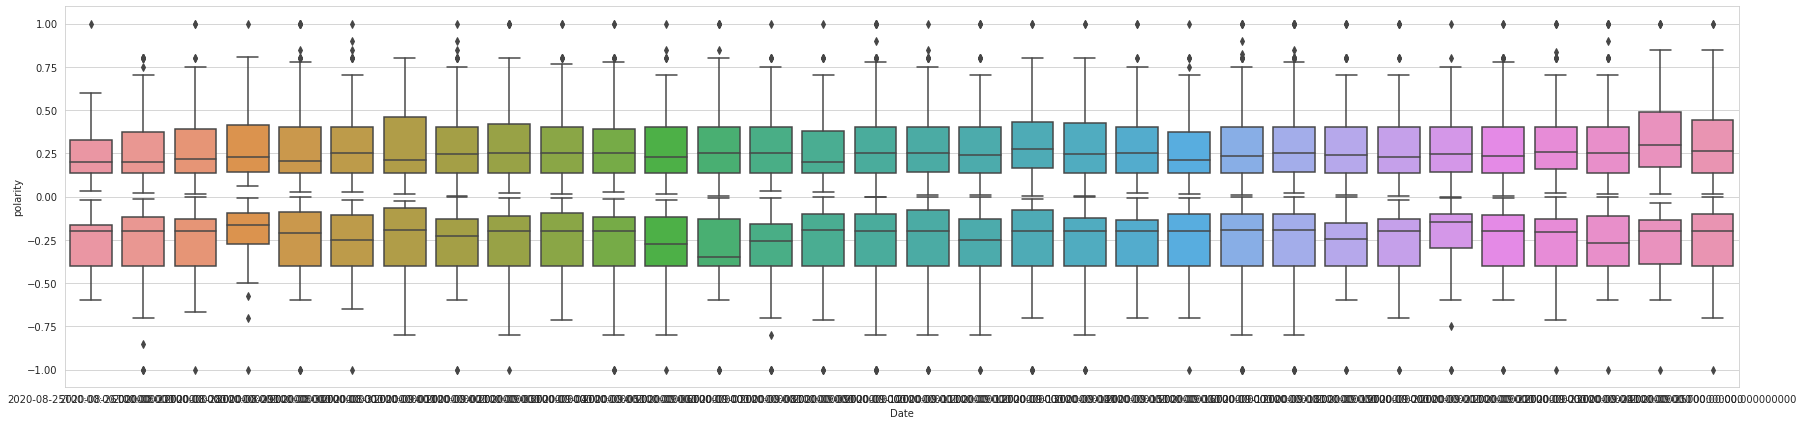

In [ ]:
pos = ps[ps['polarity']>0]
neg = ps[ps['polarity']<0]
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.boxplot(x = 'Date', y = 'polarity', data = pos, ax = ax)
sns.boxplot(x = 'Date', y = 'polarity', data = neg, ax = ax)

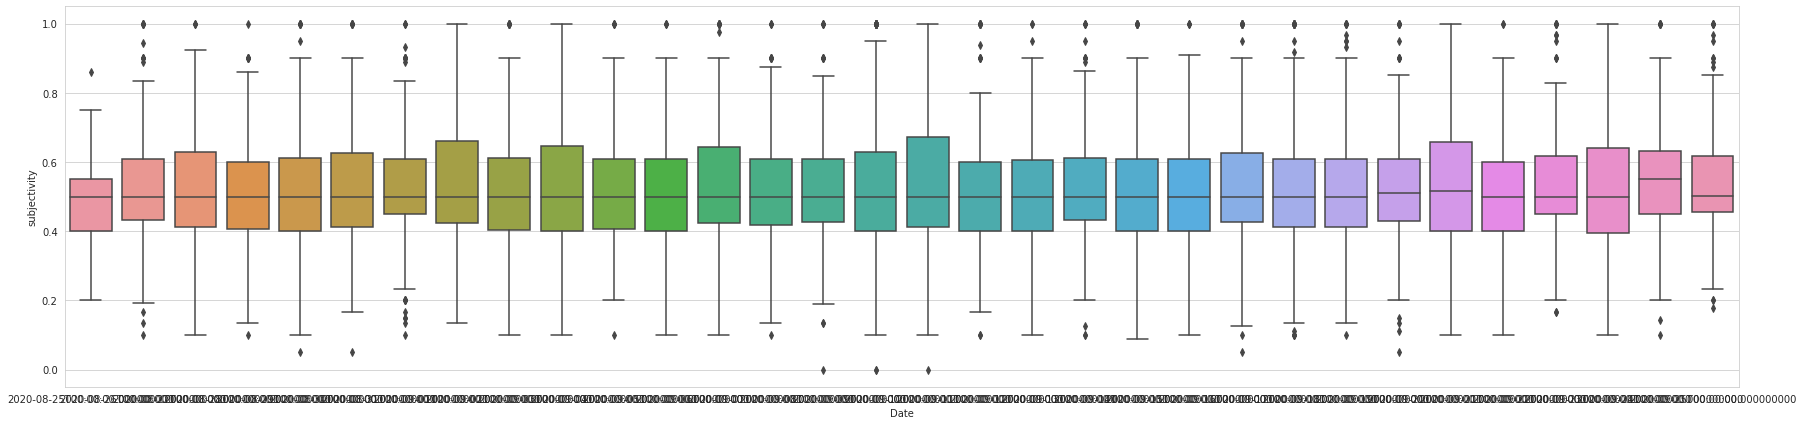

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.boxplot(x = 'Date', y = 'subjectivity', data = pos, ax = ax)

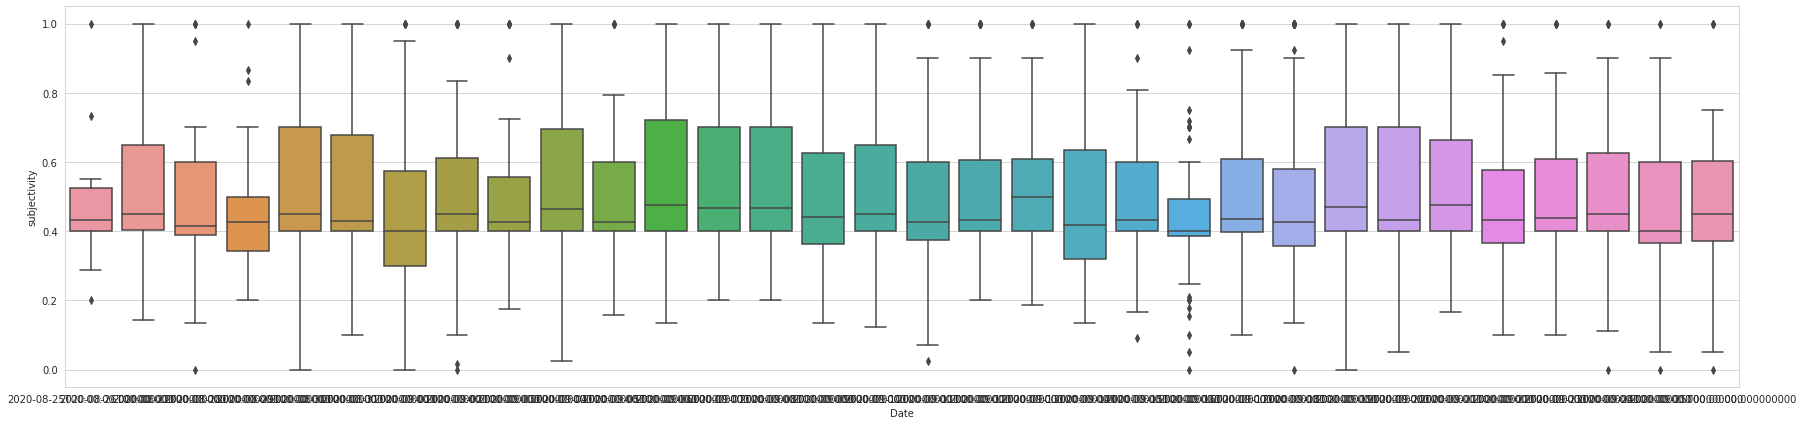

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.boxplot(x = 'Date', y = 'subjectivity', data = neg, ax = ax)

In [ ]:
xbsd = xb.groupby(['Date']).polarity.std()

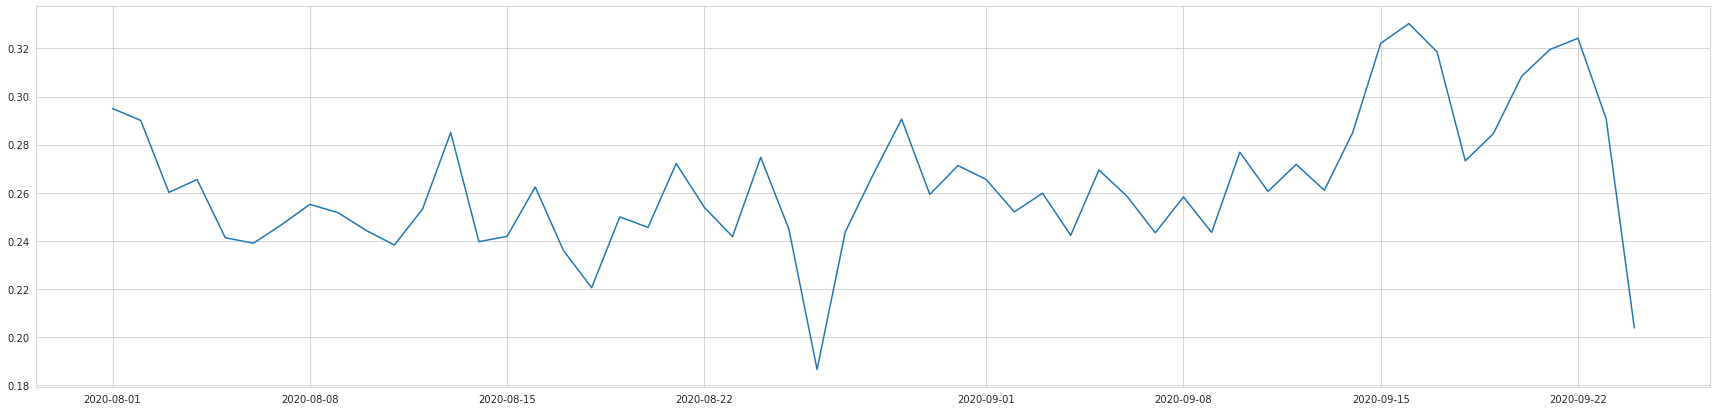

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=xbsd)

In [ ]:
pssd = ps.groupby(['Date']).polarity.std()

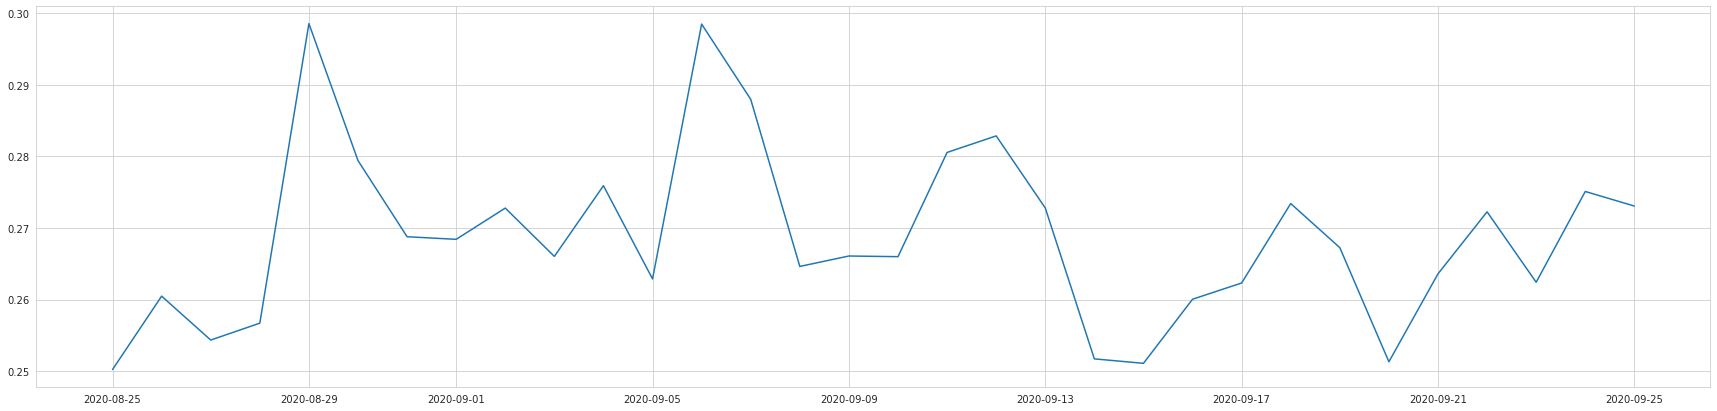

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=pssd)

In [ ]:
from google.colab import  drive
drive.mount('/drive')
xb.to_csv('/xb.csv')

#ps.to_csv('ps.csv')

Mounted at /drive


In [ ]:
pss = pd.read_csv('df_ps_vader.csv')
xbs = pd.read_csv('df_xbox_vader.csv')
sentps = pd.read_csv('pct_by_sentiment_ps_vader.csv')
sentxb = pd.read_csv('pct_by_sentiment_xbox_vader.csv')

In [ ]:
pd.merge(pss.groupby(['Date']).Sentiment_score.std(), sentps, left_on = 'Date', right_on = 'Day').to_csv('ps con sd.csv')

In [ ]:
pd.merge(pss.groupby(['Date']).Sentiment_score.std(), sentps, left_on = 'Date', right_on = 'Day')

,Sentiment_score,Unnamed: 0,Day,Sentiment,Count_by_sentiment,Count_by_day,Pct_by_day
0,0.434058,0,2020-08-25,Negatives,17,66,25.757576
1,0.434058,1,2020-08-25,Positives,49,66,74.242424
2,0.417137,2,2020-08-26,Negatives,187,373,50.134048
3,0.417137,3,2020-08-26,Positives,186,373,49.865952
4,0.437529,4,2020-08-27,Negatives,164,296,55.405405
...,...,...,...,...,...,...,...
59,0.427108,59,2020-09-23,Positives,171,398,42.964824
60,0.410929,60,2020-09-24,Negatives,218,398,54.773869
61,0.410929,61,2020-09-24,Positives,180,398,45.226131
62,0.423178,62,2020-09-25,Negatives,156,312,50.000000


In [ ]:
oss = pss.groupby(['Date']).Sentiment_score.std()

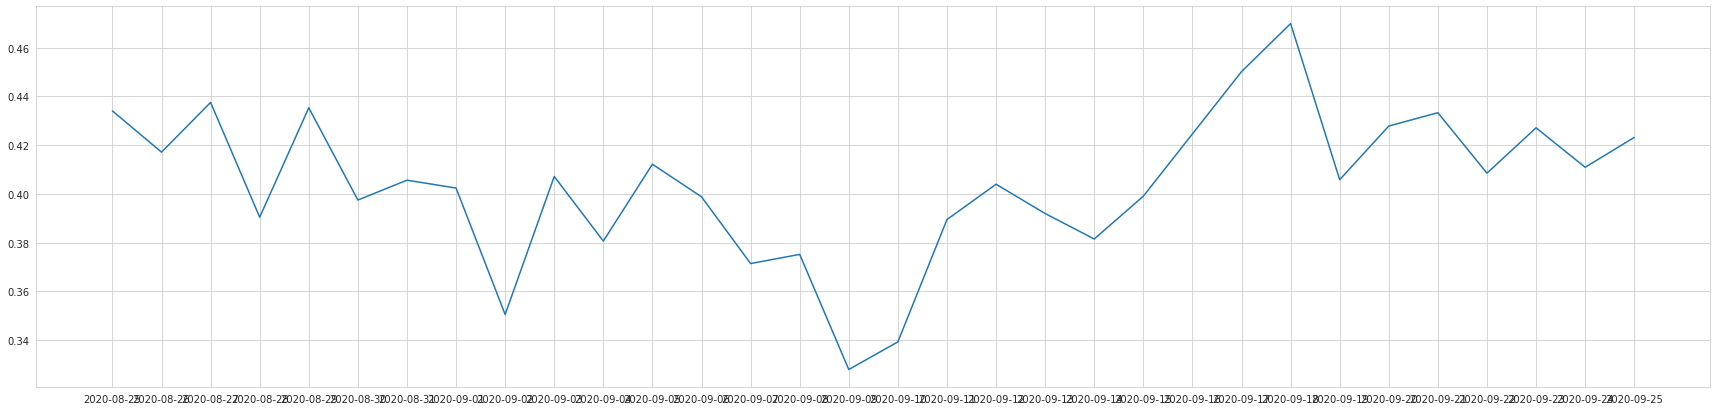

In [ ]:
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=oss)

In [ ]:
pssd = pd.DataFrame(pssd).reset_index()
oss = pd.DataFrame(oss).reset_index()

In [ ]:
oss['Date'] = pd.to_datetime(oss['Date'])

In [ ]:
sddsps = pd.merge(pssd, oss, on = 'Date')

In [ ]:
xxbs = xbs.groupby(['Date']).Sentiment_score.std()
xbsd = pd.DataFrame(xbsd).reset_index()
xxbs = pd.DataFrame(xxbs).reset_index()

In [ ]:
xxbs['Date'] = pd.to_datetime(xxbs['Date'])
sddsxb = pd.merge(xbsd, xxbs, on = 'Date')

In [ ]:
sentps['Day'] = pd.to_datetime(sentps['Day'])
sentxb['Day'] = pd.to_datetime(sentxb['Day'])

In [ ]:
dataps = pd.merge(sddsps, sentps, left_on = 'Date', right_on = 'Day')
dataxb = pd.merge(sddsxb, sentxb, left_on = 'Date', right_on = 'Day')

In [ ]:
dataps.to_csv('data ps con sds.csv')
dataxb.to_csv('data xb con sds.csv')

In [ ]:
dataps

,index_x,Date,polarity,index_y,Sentiment_score,Unnamed: 0,Day,Sentiment,Count_by_sentiment,Count_by_day,Pct_by_day
0,0,2020-08-25,0.250226,0,0.434058,0,2020-08-25,Negatives,17,66,25.757576
1,0,2020-08-25,0.250226,0,0.434058,1,2020-08-25,Positives,49,66,74.242424
2,1,2020-08-26,0.260474,1,0.417137,2,2020-08-26,Negatives,187,373,50.134048
3,1,2020-08-26,0.260474,1,0.417137,3,2020-08-26,Positives,186,373,49.865952
4,2,2020-08-27,0.254342,2,0.437529,4,2020-08-27,Negatives,164,296,55.405405
...,...,...,...,...,...,...,...,...,...,...,...
59,29,2020-09-23,0.262420,29,0.427108,59,2020-09-23,Positives,171,398,42.964824
60,30,2020-09-24,0.275103,30,0.410929,60,2020-09-24,Negatives,218,398,54.773869
61,30,2020-09-24,0.275103,30,0.410929,61,2020-09-24,Positives,180,398,45.226131
62,31,2020-09-25,0.273065,31,0.423178,62,2020-09-25,Negatives,156,312,50.000000


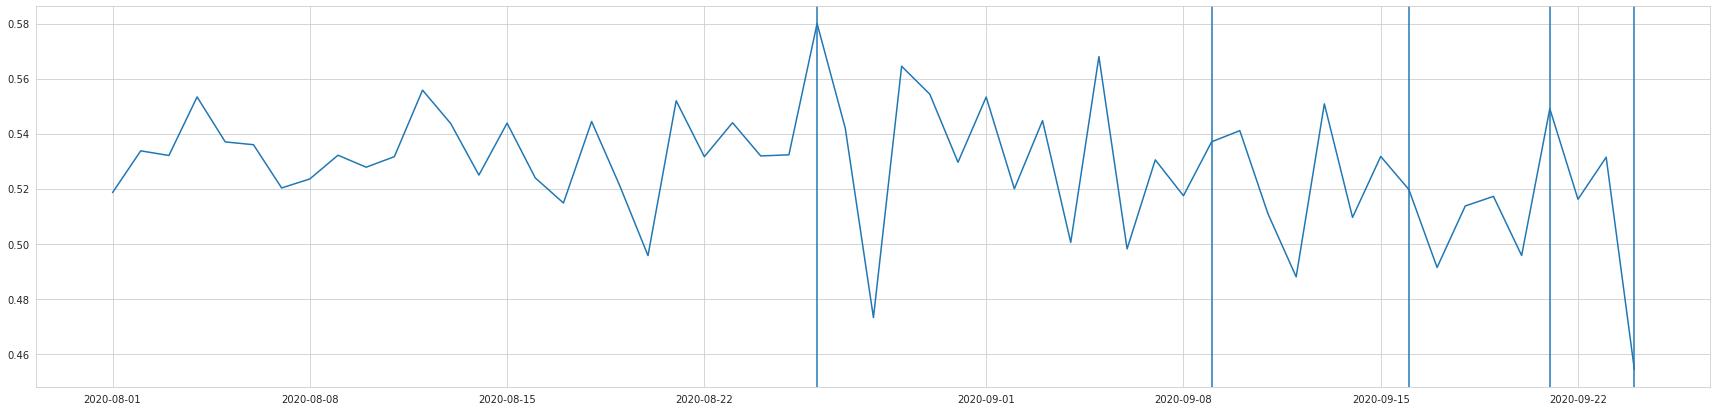

In [ ]:
sns.set_style("whitegrid")
pos = xb[xb['polarity']>0]
neg = xb[xb['polarity']<0]
xbsd = pos.groupby(['Date']).subjectivity.mean()
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=xbsd)
plt.axvline(pd.to_datetime('2020-08-26')) # Gamepass
plt.axvline(pd.to_datetime('2020-09-24')) # Bethesda
plt.axvline(pd.to_datetime('2020-09-09')) # Precio
plt.axvline(pd.to_datetime('2020-09-16')) 
plt.axvline(pd.to_datetime('2020-09-21'))

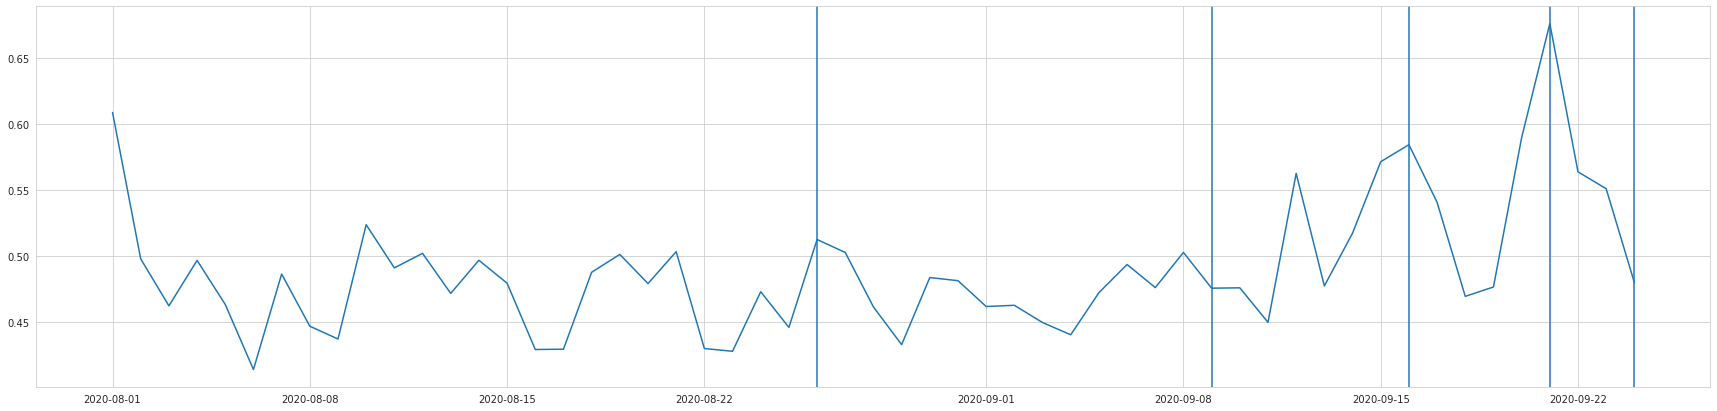

In [ ]:
xbsd = neg.groupby(['Date']).subjectivity.mean()
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=xbsd)
plt.axvline(pd.to_datetime('2020-08-26')) # Gamepass
plt.axvline(pd.to_datetime('2020-09-24')) # Bethesda
plt.axvline(pd.to_datetime('2020-09-09')) # Precio
plt.axvline(pd.to_datetime('2020-09-16')) 
plt.axvline(pd.to_datetime('2020-09-21'))

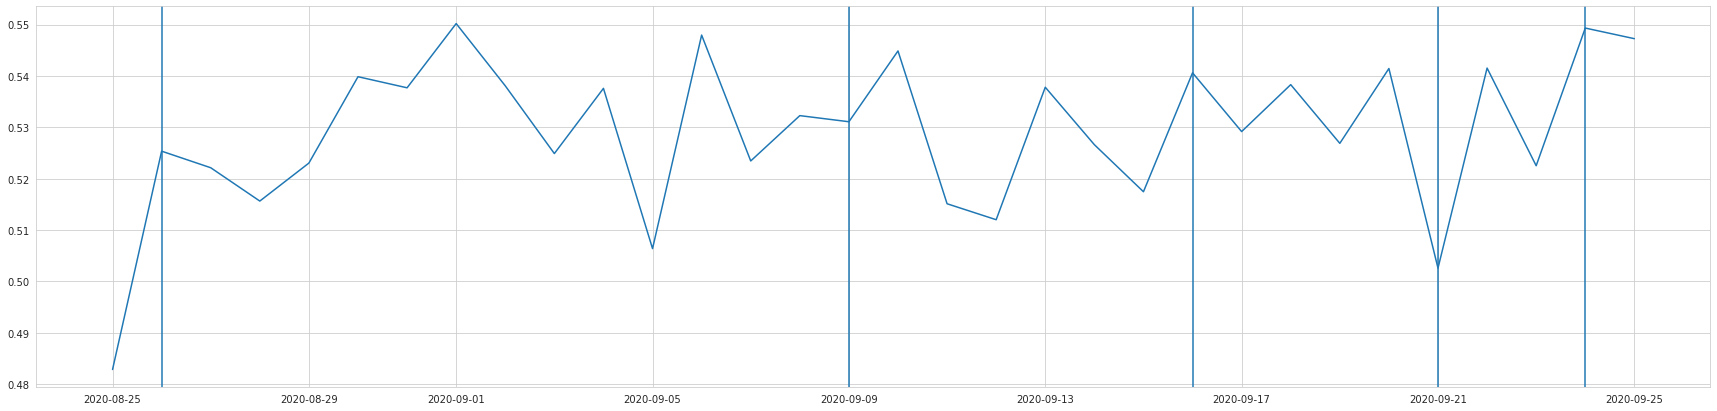

In [ ]:
sns.set_style("whitegrid")
pos = ps[ps['polarity']>0]
neg = ps[ps['polarity']<0]
xbsd = pos.groupby(['Date']).subjectivity.mean()
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=xbsd)
plt.axvline(pd.to_datetime('2020-08-26')) # Gamepass
plt.axvline(pd.to_datetime('2020-09-24')) # Bethesda
plt.axvline(pd.to_datetime('2020-09-09')) # Precio
plt.axvline(pd.to_datetime('2020-09-16')) 
plt.axvline(pd.to_datetime('2020-09-21'))

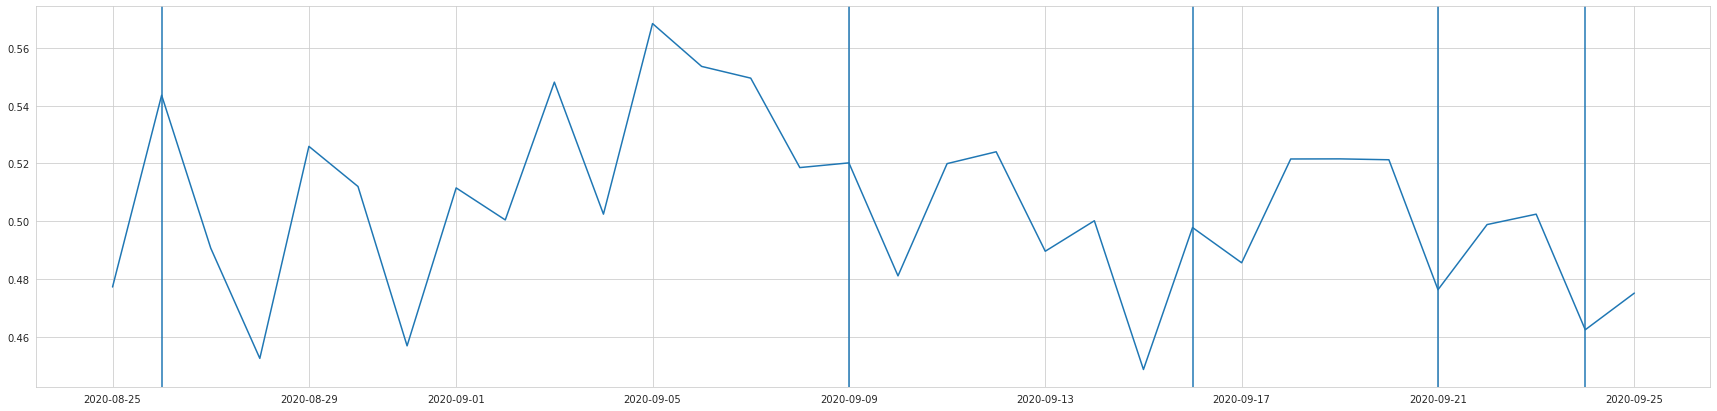

In [ ]:
sns.set_style("whitegrid")
pos = ps[ps['polarity']>0]
neg = ps[ps['polarity']<0]
xbsd = neg.groupby(['Date']).subjectivity.mean()
fig, ax = pyplot.subplots(figsize = (30, 7))
sns.lineplot(data=xbsd)
plt.axvline(pd.to_datetime('2020-08-26')) # Gamepass
plt.axvline(pd.to_datetime('2020-09-24')) # Bethesda
plt.axvline(pd.to_datetime('2020-09-09')) # Precio
plt.axvline(pd.to_datetime('2020-09-16')) 
plt.axvline(pd.to_datetime('2020-09-21'))

In [ ]:
xb.to_csv('xb_subjectivity.csv')
ps.to_csv('ps_subjectivity.csv')

In [2]:
import cherrypy
import pandas as pd
import analyzer
import sys
buscador = analyzer.analizador()

class TweetAnalyzer(object):

   @cherrypy.expose
   @cherrypy.tools.json_out()
   @cherrypy.tools.json_in()
   def process(self):
      data = cherrypy.request.json
      if (len(data)<2):
        sys.exit()
      query = data["query"]
      count = data["count"]
      output = buscador.search_for(query, count)
      return output
if __name__ == '__main__':
   config = {'server.socket_host': '0.0.0.0'}
   cherrypy.config.update(config)
   cherrypy.quickstart(TweetAnalyzer())

2